In [5]:
import csv
import pandas

path = '/Users/d062864/Documents/01_code/pythonStarter/data/flow_survey.csv'

In [10]:
df.columns

Index(['Timestamp', 'What are you doing?', 'Mental Capacity', 'In a flow?',
       'Activity Group'],
      dtype='object')

In [13]:
df = pandas.read_csv(path)

df.rename(columns={
    'In a flow?': 'flow',
    'Activity Group': 'activity'
}, inplace=True)

df_flow= df[['flow', 'activity']]

df_flow

,flow,activity
0,Yes,Fun Projects PC
1,Yes,Reading
2,Yes,Reading
3,Yes,RFP Work
4,Yes,RFP Work
5,Yes,Reading
6,No,Fun Projects PC
7,No,Fitness
8,Yes,Food
9,Yes,RFP Work


In [73]:
df_new = df_flow.groupby(['activity', 'flow']).size().reset_index(name='counts')
df_new = df_new.set_index(['activity', 'flow'])['counts'].unstack()
df_new['No']=df_new['No'].fillna(0).astype(int)
df_new['Yes']=df_new['Yes'].fillna(0).astype(int)
df_new

flow,No,Yes
activity,,
Email Work,1,4
Fitness,1,3
Food,0,6
Fun Projects PC,2,2
Fun Projects Physical,0,3
Junk,1,0
RFP Work,4,3
Reading,2,5
Relationship,4,0


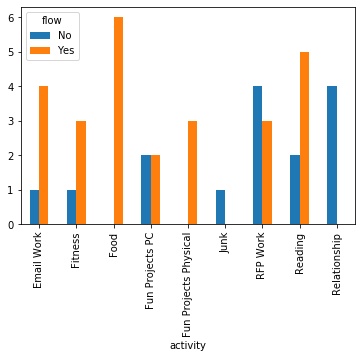

In [74]:
df_new.plot.bar()